In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import desc, count_unique_values

pd.options.mode.copy_on_write = True

## Undestanding the data

In [3]:
# Load the data
data_2021 = pd.read_csv('survey_results_public_2021.csv')
data_2022 = pd.read_csv('survey_results_public_2022.csv')
data_2023 = pd.read_csv('survey_results_public_2023.csv')
data_2024 = pd.read_csv('survey_results_public_2024.csv')

schema_2021 = pd.read_csv('survey_results_schema_2021.csv')
schema_2022 = pd.read_csv('survey_results_schema_2022.csv')
schema_2023 = pd.read_csv('survey_results_schema_2023.csv')
schema_2024 = pd.read_csv('survey_results_schema_2024.csv')

display(data_2024)
display(schema_2021)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [4]:
desc(schema_2021, 'LearnCode')

['How did you learn to code? Select all that apply.']

## What have been the major trends in technology usage across programming languages, databases, platforms, and tools over the past four years, and what emerging technologies are shaping the industry?

In [5]:
# Collumns of interest
cols_to_analyze = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith", 
    "PlatformHaveWorkedWith", 
    "WebframeHaveWorkedWith", 
    'MiscTechHaveWorkedWith',
    'ToolsTechHaveWorkedWith',
    'NEWCollabToolsHaveWorkedWith'
]

tech_data_2021 = data_2021[cols_to_analyze]
tech_data_2022 = data_2022[cols_to_analyze]
tech_data_2023 = data_2023[cols_to_analyze]
tech_data_2024 = data_2024[cols_to_analyze]

#Dictionare of df
df_to_analyze = {
    '2021':tech_data_2021,
    '2022':tech_data_2022,
    '2023':tech_data_2023,
    '2024':tech_data_2024
}

display(tech_data_2024)


,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm
2,C#,Firebase Realtime Database,Google Cloud,ASP.NET CORE,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,MSBuild,Visual Studio
3,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,NumPy;Pandas;Ruff;TensorFlow,Docker;npm;Pip,NaN
4,C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,NaN,APT;Make;npm,Vim
...,...,...,...,...,...,...,...
65432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,PostgreSQL;SQLite,NaN,Angular;Node.js;React,GTK;OpenGL,Ansible;APT;Docker;Make;npm;Pip;Podman,Vim;Visual Studio Code


In [6]:
# Loop to get all unique values
results = {}

for date, df in df_to_analyze.items():
    results[date] = {}
    for col in cols_to_analyze:
        results[date][col] = count_unique_values(df, col)

print(results)

{'2021': {'LanguageHaveWorkedWith':                             count
LanguageHaveWorkedWith           
JavaScript              65.066722
HTML/CSS                56.168875
Python                  48.316476
SQL                     47.154462
Java                    35.409255
Node.js                 33.967969
TypeScript              30.245152
C#                      27.907767
Bash/Shell              27.180446
C++                     24.353728
PHP                     22.013915
C                       21.041320
PowerShell              10.771398
Go                       9.566886
Kotlin                   8.336875
Rust                     7.041296
Ruby                     6.762024
Dart                     6.028631
Assembly                 5.624294
Swift                    5.104606
R                        5.081535
VBA                      4.671127
Matlab                   4.669913
Groovy                   3.010066
Objective-C              2.804862
Scala                    2.608157
Perl        

In [7]:
#Standarize names
for key in results:
    results[key]['LanguageHaveWorkedWith'].rename(index=lambda x: x.replace('Bash/Shell (all shells)', 'Bash/Shell') if isinstance(x, str) else x, inplace=True)

for key in results:
    results[key]['PlatformHaveWorkedWith'].rename(index=lambda x: x.replace('Amazon Web Services (AWS)', 'AWS') if isinstance(x, str) else x, inplace=True)
    
for key in results:
    results[key]['PlatformHaveWorkedWith'].rename(index=lambda x: x.replace('Google Cloud Platform', 'Google Cloud') if isinstance(x, str) else x, inplace=True)
    
for key in results:
    results[key]['PlatformHaveWorkedWith'].rename(index=lambda x: x.replace('DigitalOcean', 'Digital Ocean') if isinstance(x, str) else x, inplace=True)

for key in results:
    results[key]['WebframeHaveWorkedWith'].rename(index=lambda x: x.replace('React.js', 'React') if isinstance(x, str) else x, inplace=True)
    
for key in results:
    results[key]['NEWCollabToolsHaveWorkedWith'].rename(index=lambda x: x.replace('IntelliJ IDEA', 'IntelliJ') if isinstance(x, str) else x, inplace=True)
    
# Verify standarization
display(results['2024']['LanguageHaveWorkedWith'].head(7))

,count
LanguageHaveWorkedWith,
JavaScript,62.753368
HTML/CSS,53.252992
Python,51.416855
SQL,51.354925
TypeScript,38.748012
Bash/Shell,34.165202
Java,30.528078


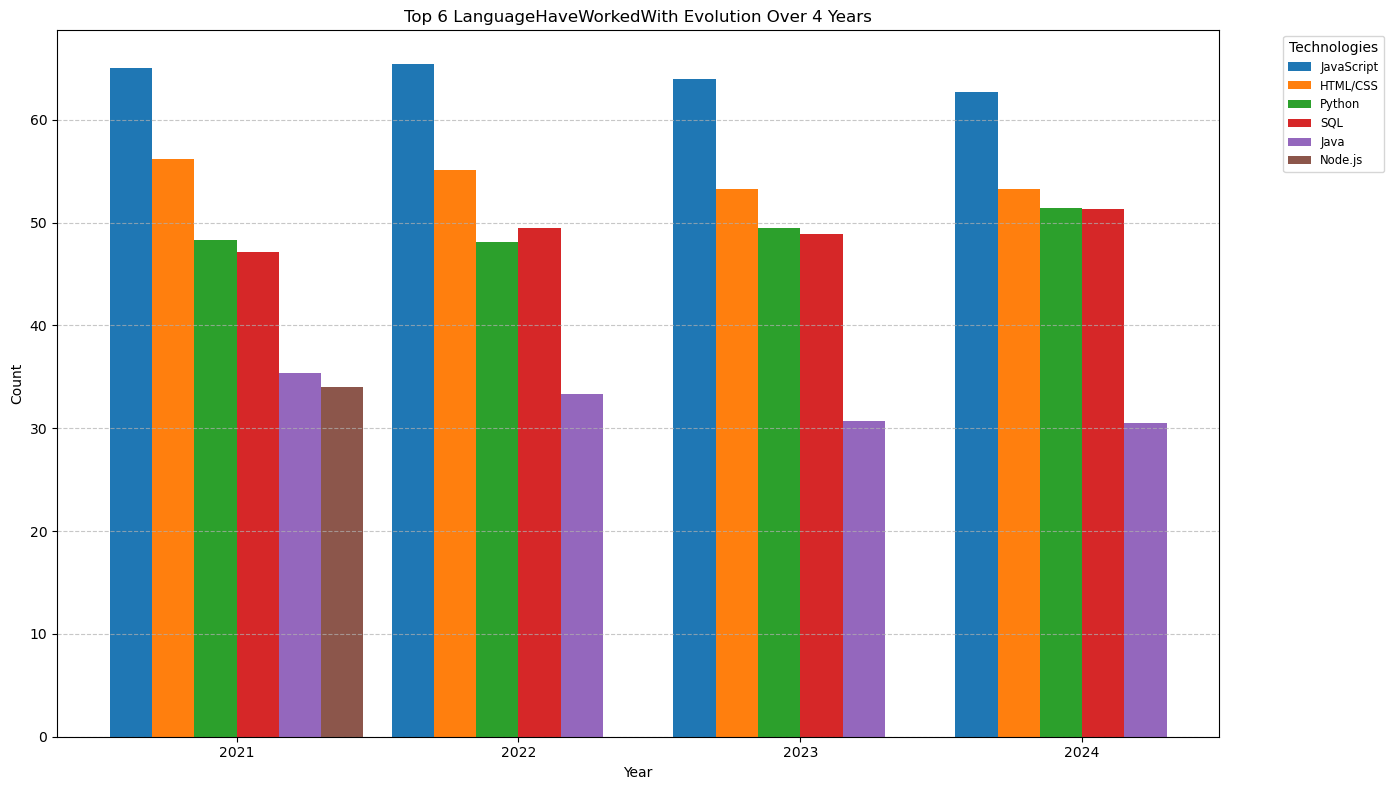

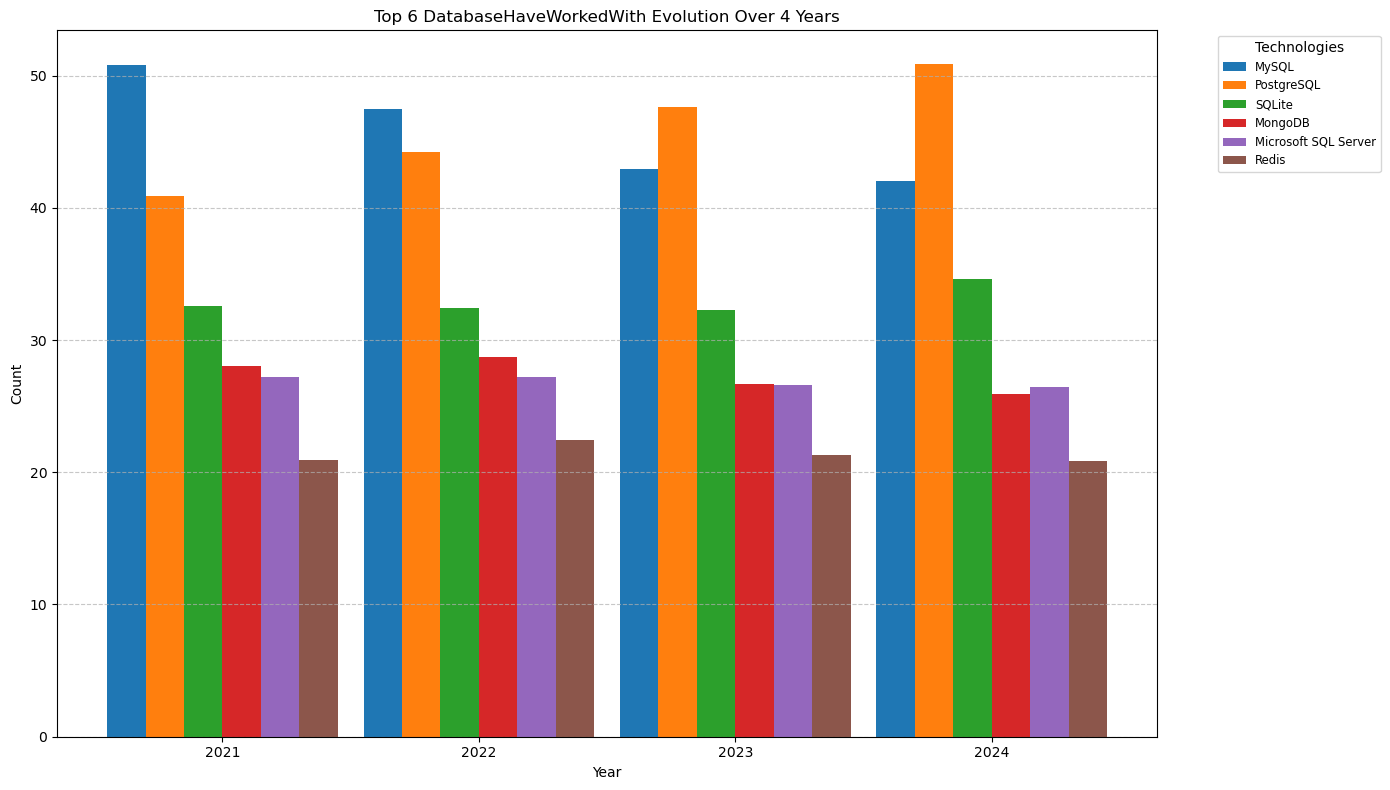

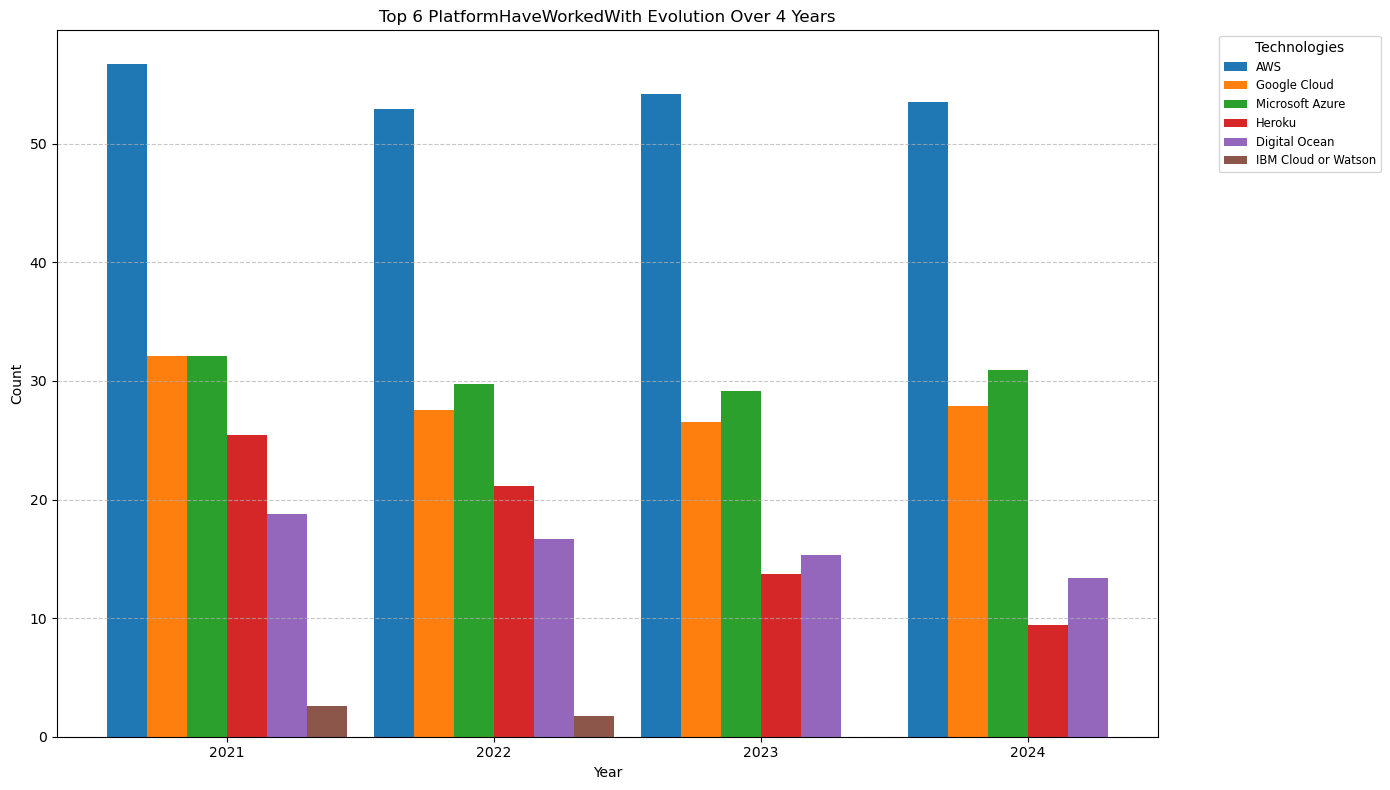

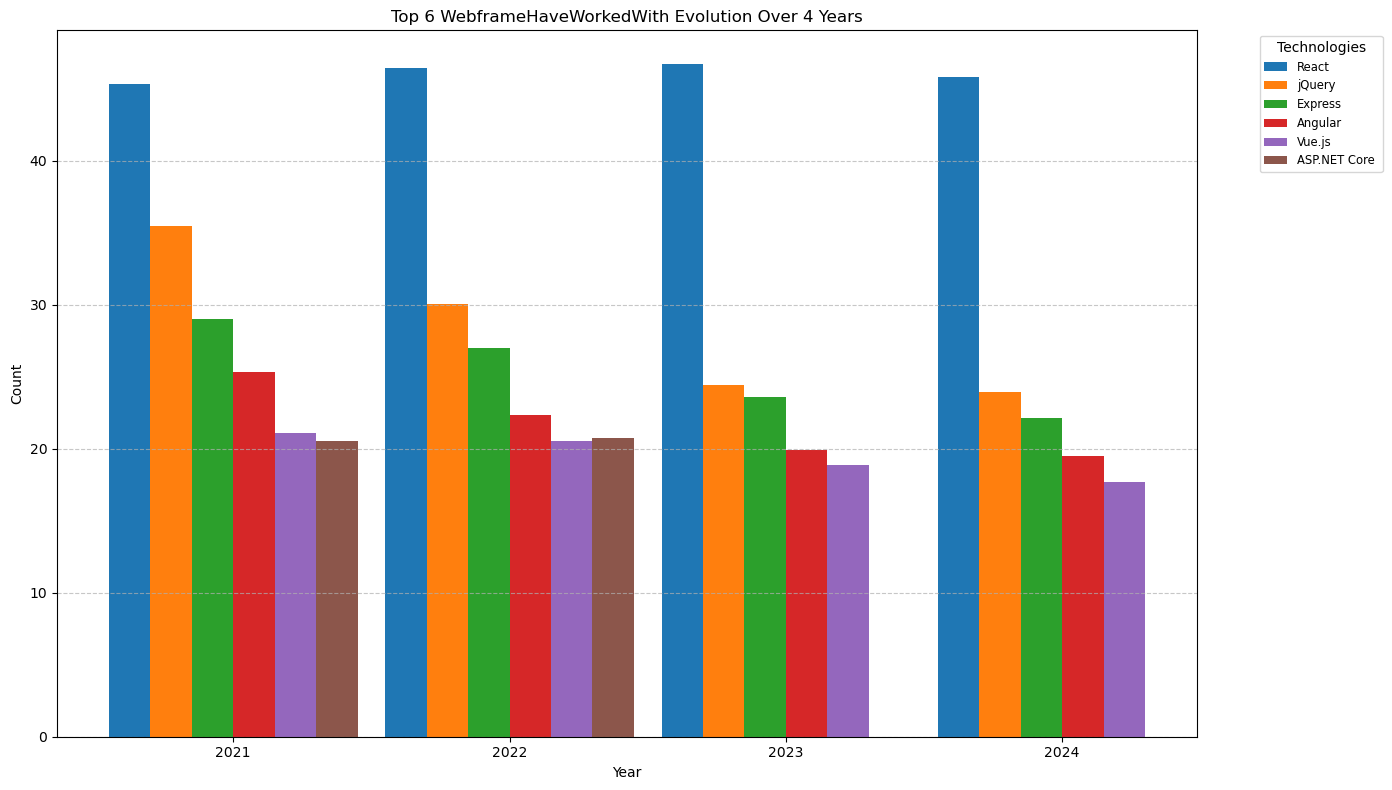

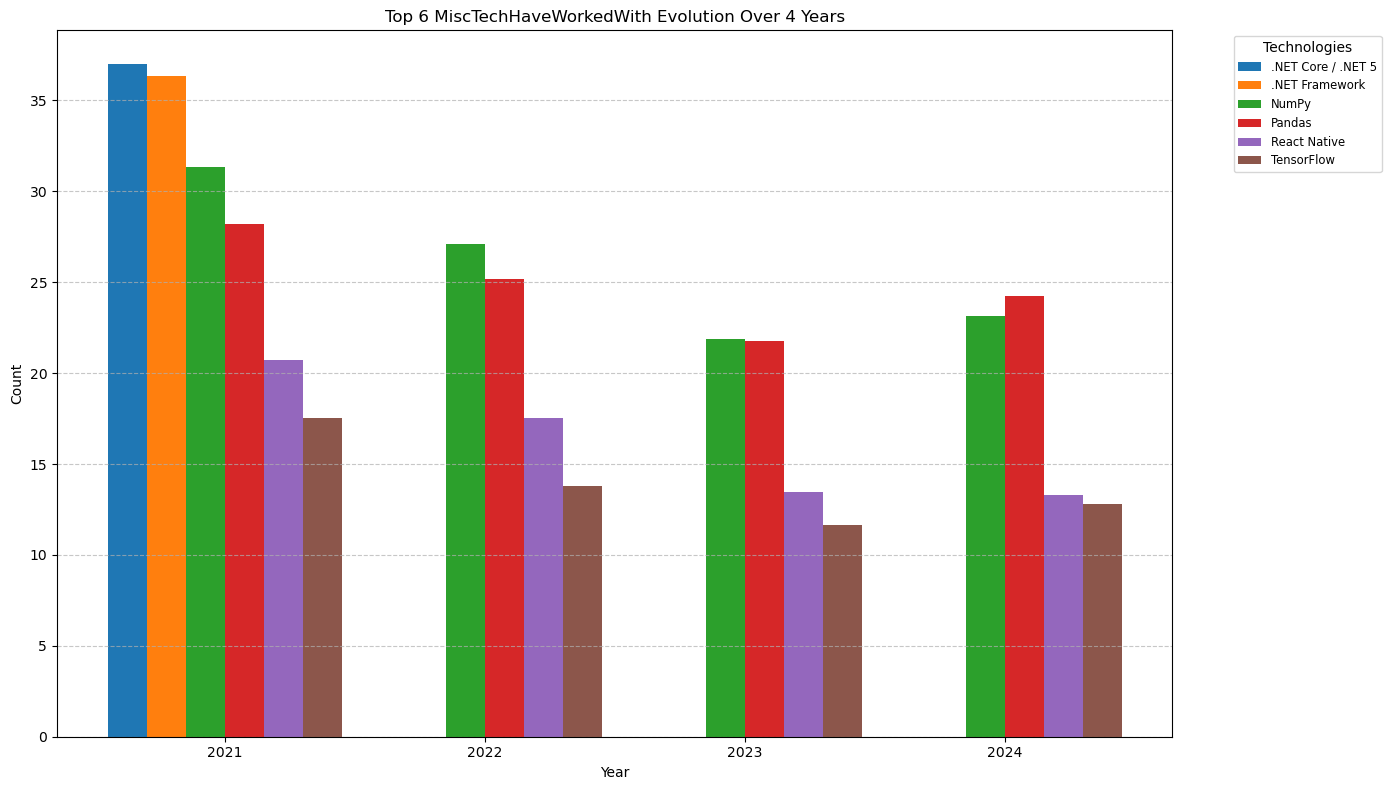

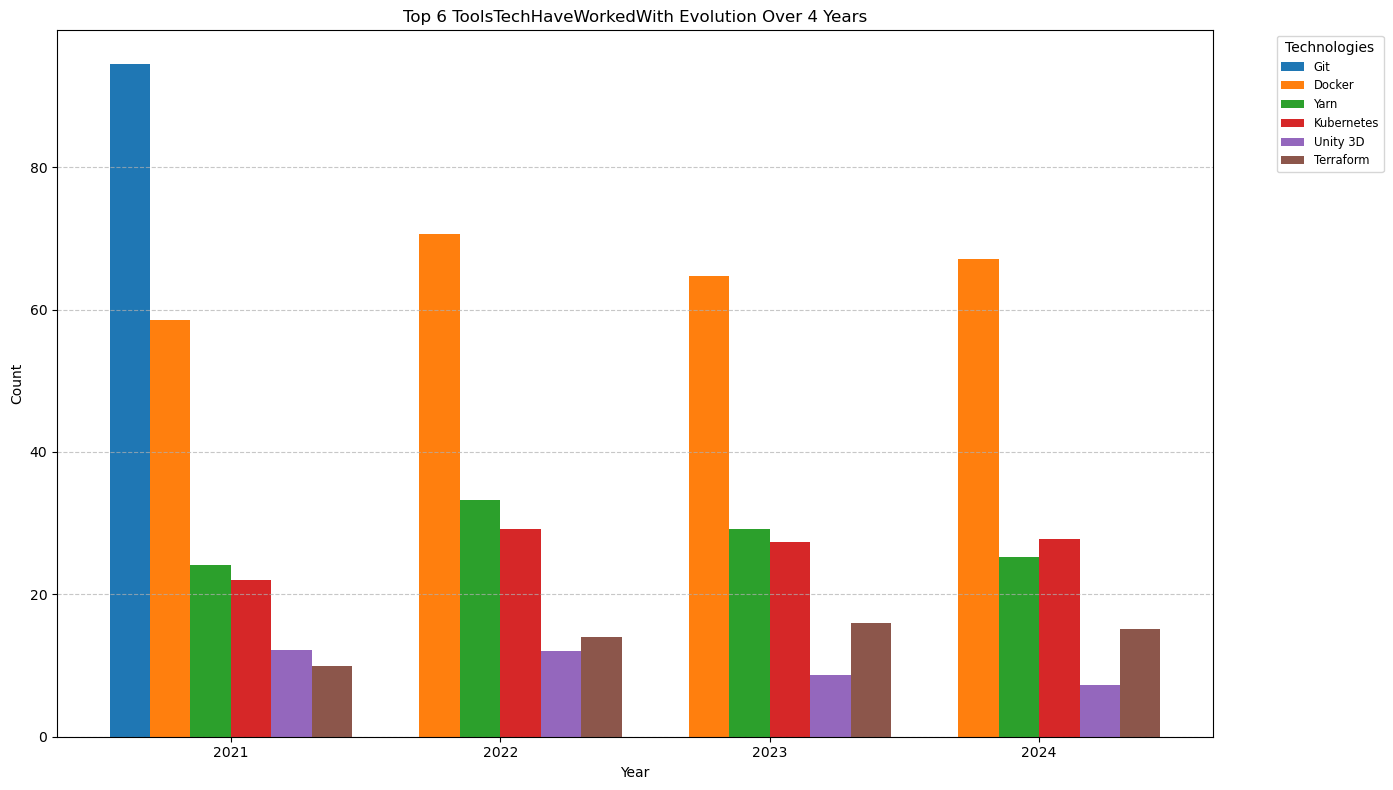

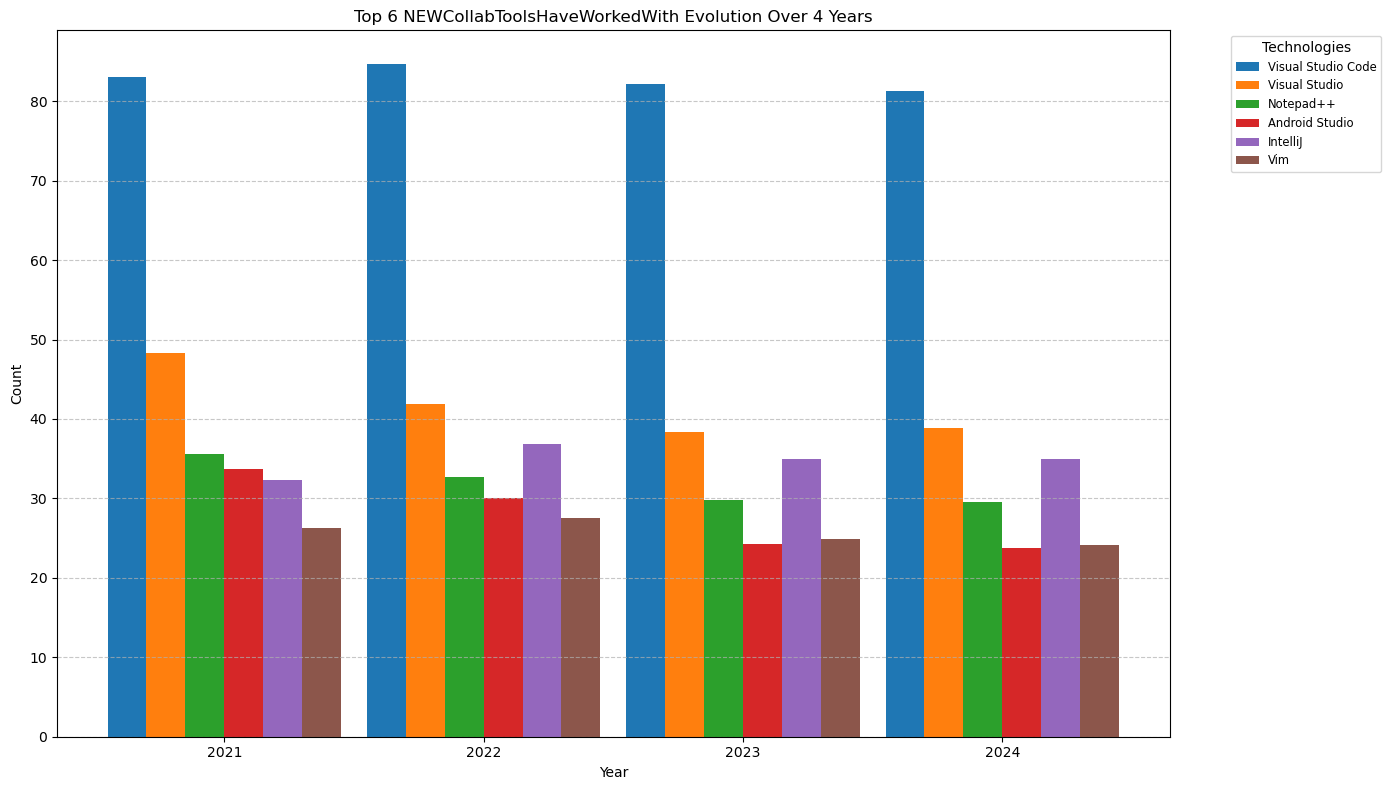

In [8]:
# Generate bar charts, directly plotting the values for each year
for col in cols_to_analyze:
    # Prepare data for plotting
    col_data = {year: results[year][col] for year in results if col in results[year]}
    years = sorted(col_data.keys())

    # Concatenate dataframes for all years
    all_data = pd.concat(
        [col_data[year]["count"].rename(year) for year in years], axis=1
    )

    # Identify top 6 technologies based on the first year's data
    top_6_techs = col_data[years[0]].sort_values(by="count", ascending=False).head(6).index

    # Extract data for the top 10 technologies
    top_6_data = all_data.loc[top_6_techs, years]

    # Prepare data for bar charts
    x = np.arange(len(years))  # Years as X-axis
    width = 0.15  # Width of each bar

    plt.figure(figsize=(14, 8))
    for i, tech in enumerate(top_6_techs):
        values = top_6_data.loc[tech].values
        plt.bar(x + i * width, values, width, label=tech)

    # Add labels and formatting
    plt.title(f"Top 6 {col} Evolution Over 4 Years")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(x + width * (len(top_6_techs) - 1) / 2, years)
    plt.legend(title="Technologies", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [9]:
ai_data = data_2024[
    [
        'AISearchDevHaveWorkedWith',
        'AISearchDevWantToWorkWith',
        'AIToolCurrently Using',
        'AIToolInterested in Using',
        'AISent',
        'AIAcc',
        'AIComplex',
        'AINextMuch more integrated',
        'AINextMore integrated',
        'AINextLess integrated',
        'AINextMuch less integrated',
        'AIThreat',
        'AIEthics',
        'AIChallenges'
    ]
]

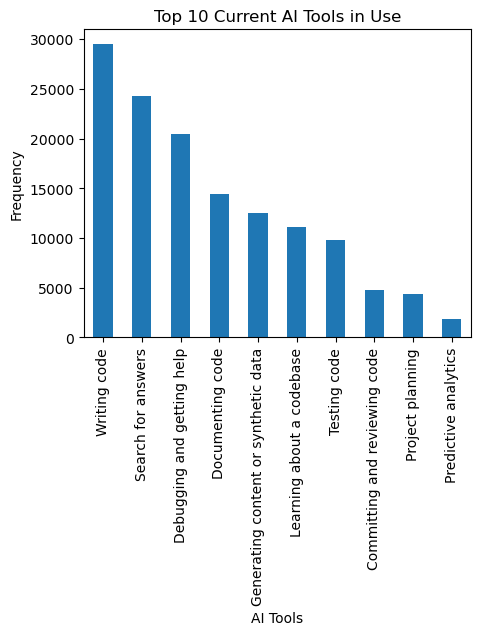

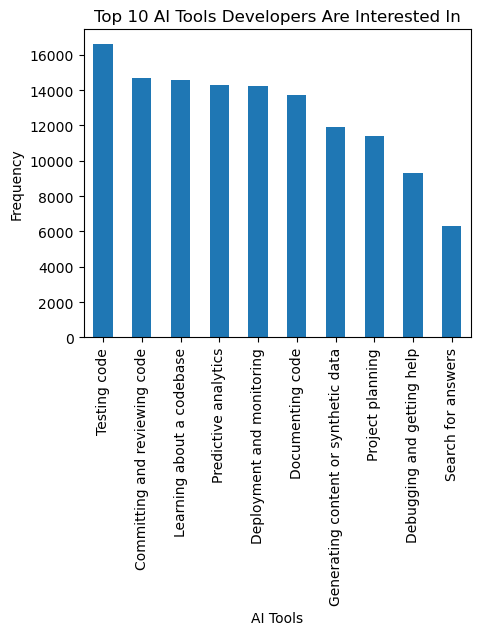

In [10]:
# Frequency Analysis for Current and Future AI Tool Usage
current_ai_tools = ai_data['AIToolCurrently Using'].dropna().str.split(';').explode().value_counts()
future_ai_tools = ai_data['AIToolInterested in Using'].dropna().str.split(';').explode().value_counts()

# Visualizations for Current and Future AI Tool Usage Trends
plt.figure(figsize=(5, 4))
current_ai_tools.head(10).plot(kind='bar', title='Top 10 Current AI Tools in Use')
plt.xlabel('AI Tools')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
future_ai_tools.head(10).plot(kind='bar', title='Top 10 AI Tools Developers Are Interested In')
plt.xlabel('AI Tools')
plt.ylabel('Frequency')
plt.show()



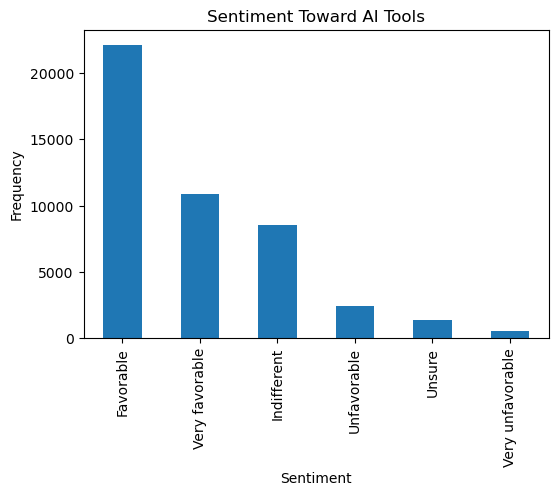

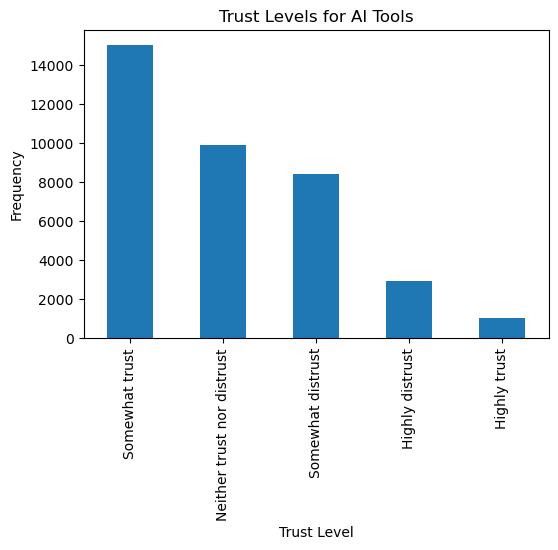

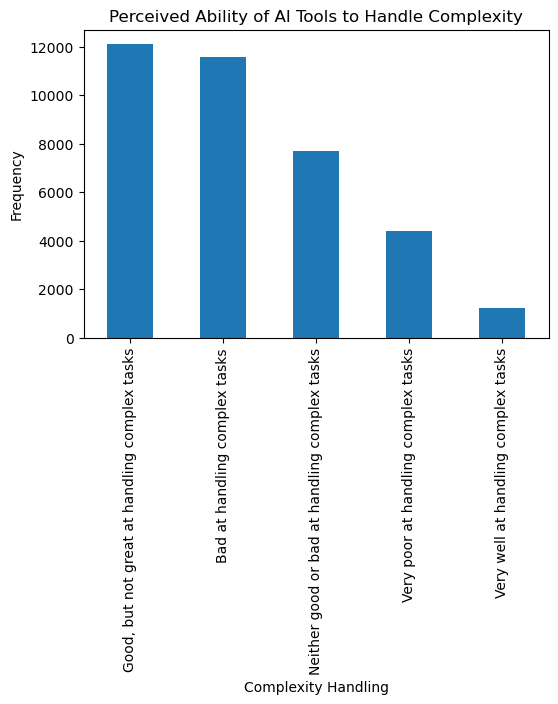

In [11]:
#Analyzing Sentiment and Perceptions of AI Tools
sentiment_counts = ai_data['AISent'].value_counts()
trust_levels = ai_data['AIAcc'].value_counts()
complexity_handling = ai_data['AIComplex'].value_counts()

# Visualizations for AI Sentiment, Trust, and Complexity Handling
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', title='Sentiment Toward AI Tools')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
trust_levels.plot(kind='bar', title='Trust Levels for AI Tools')
plt.xlabel('Trust Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
complexity_handling.plot(kind='bar', title='Perceived Ability of AI Tools to Handle Complexity')
plt.xlabel('Complexity Handling')
plt.ylabel('Frequency')
plt.show()



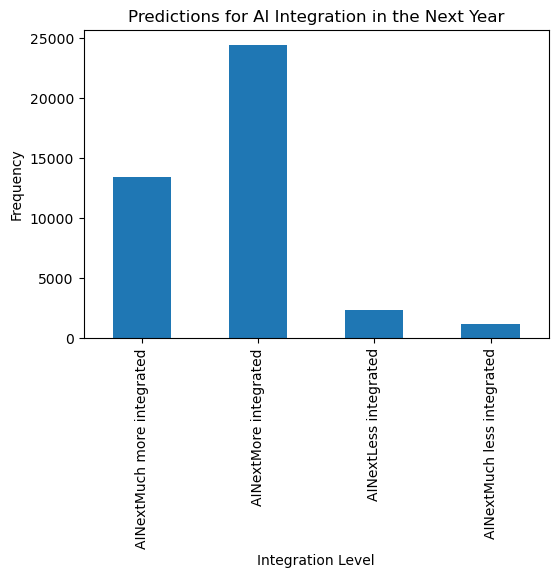

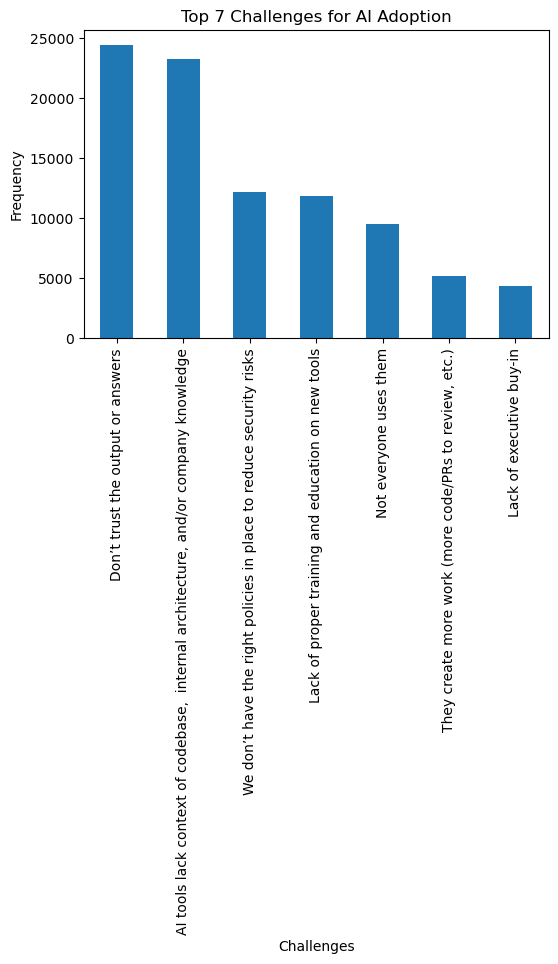

In [13]:
# Analyzing AI Integration and Challenges
integration_future = ai_data[['AINextMuch more integrated', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated']].notnull().sum()
ai_challenges = ai_data['AIChallenges'].dropna().str.split(';').explode().value_counts()
ai_threat = ai_data['AIThreat'].value_counts()

# Visualization for Future AI Integration
plt.figure(figsize=(6, 4))
integration_future.plot(kind='bar', title='Predictions for AI Integration in the Next Year')
plt.xlabel('Integration Level')
plt.ylabel('Frequency')
plt.show()

# Visualization for AI Challenges
plt.figure(figsize=(6, 4))
ai_challenges.head(7).plot(kind='bar', title='Top 7 Challenges for AI Adoption')
plt.xlabel('Challenges')
plt.ylabel('Frequency')
plt.show()
